# Categorical Model (Phishing vs Non-Phishing)

In [17]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load and clean data
data = pd.read_csv('Cleaned_Merged_Featured_Eng_and_Phishing_Data.csv')

# Recode the 'Scam_Types' column to binary
data['Scam_Types'] = data['Scam_Types'].apply(lambda x: 1 if x == 'PHISHING' else 0)

# Remove non-numeric columns except for 'Scam_Types'
data_numeric = data.select_dtypes(include=[np.number])

# Replacing the 'Scam_Types' column back into the data
data_numeric['Scam_Types'] = data['Scam_Types']

# Filling missing values with the median of each column
data_numeric.fillna(data_numeric.median(), inplace=True)

# Splitting data into training and testing sets
X = data_numeric.drop('Scam_Types', axis=1)
y = data_numeric['Scam_Types']

# Before splitting data
print("X shape:", X.shape)
print("y shape:", y.shape)

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# After splitting data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X shape: (1993, 22)
y shape: (1993,)
X_train shape: (1594, 22)
y_train shape: (1594,)
X_test shape: (399, 22)
y_test shape: (399,)


In [2]:
# Model initialization
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)


In [3]:
# Grid Search for Decision Tree
param_grid_dt = {'max_depth': [3, 5]}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=3, n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train_scaled, y_train)

# Evaluation for Decision Tree
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(X_test_scaled)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Accuracy for Decision Tree: {accuracy_score(y_test, y_pred_dt)}")
print(f"Classification Report for Decision Tree:\n{classification_report(y_test, y_pred_dt)}")


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(

In [4]:
# Grid Search for Gradient Boosting
param_grid_gb = {'n_estimators': [50], 'max_depth': [3], 'learning_rate': [0.01]}
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=3, n_jobs=-1, verbose=2)
grid_search_gb.fit(X_train_scaled, y_train)

# Evaluation for Gradient Boosting
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test_scaled)
print(f"Best parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Accuracy for Gradient Boosting: {accuracy_score(y_test, y_pred_gb)}")
print(f"Classification Report for Gradient Boosting:\n{classification_report(y_test, y_pred_gb)}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
Accuracy for Gradient Boosting: 0.7243107769423559
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.69      0.77      0.73       192
           1       0.76      0.69      0.72       207

    accuracy                           0.72       399
   macro avg       0.73      0.73      0.72       399
weighted avg       0.73      0.72      0.72       399



In [5]:
# Grid Search for AdaBoost
param_grid_ab = {'n_estimators': [50], 'learning_rate': [0.01]}
grid_search_ab = GridSearchCV(ab_model, param_grid_ab, cv=3, n_jobs=-1, verbose=2)
grid_search_ab.fit(X_train_scaled, y_train)

# Evaluation for AdaBoost
best_ab_model = grid_search_ab.best_estimator_
y_pred_ab = best_ab_model.predict(X_test_scaled)
print(f"Best parameters for AdaBoost: {grid_search_ab.best_params_}")
print(f"Accuracy for AdaBoost: {accuracy_score(y_test, y_pred_ab)}")
print(f"Classification Report for AdaBoost:\n{classification_report(y_test, y_pred_ab)}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
Accuracy for AdaBoost: 0.6641604010025063
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.62      0.81      0.70       192
           1       0.75      0.53      0.62       207

    accuracy                           0.66       399
   macro avg       0.68      0.67      0.66       399
weighted avg       0.68      0.66      0.66       399



In [6]:
# Grid Search for Random Forest
param_grid_rf = {'n_estimators': [50], 'max_depth': [10]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Evaluation for Random Forest
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test_scaled)
print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Accuracy for Random Forest: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report for Random Forest:\n{classification_report(y_test, y_pred_rf)}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Accuracy for Random Forest: 0.7769423558897243
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       192
           1       0.81      0.74      0.78       207

    accuracy                           0.78       399
   macro avg       0.78      0.78      0.78       399
weighted avg       0.78      0.78      0.78       399



In [7]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf_model), 
    ('gb', best_gb_model), 
    ('ab', best_ab_model), 
    ('dt', best_dt_model)], 
    voting='hard')

voting_clf.fit(X_train_scaled, y_train)

# Evaluation for Voting classifier
y_pred_voting = voting_clf.predict(X_test_scaled)
print(f"Accuracy for Voting Classifier: {accuracy_score(y_test, y_pred_voting)}")
print(f"Classification Report for Voting Classifier:\n{classification_report(y_test, y_pred_voting)}")
print(f"Confusion Matrix for Voting Classifier:\n{confusion_matrix(y_test, y_pred_voting)}")
print(f"ROC-AUC for Voting Classifier: {roc_auc_score(y_test, y_pred_voting)}")


Accuracy for Voting Classifier: 0.7418546365914787
Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       192
           1       0.81      0.65      0.72       207

    accuracy                           0.74       399
   macro avg       0.75      0.75      0.74       399
weighted avg       0.75      0.74      0.74       399

Confusion Matrix for Voting Classifier:
[[161  31]
 [ 72 135]]
ROC-AUC for Voting Classifier: 0.7453577898550724


In [8]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base learners
base_learners = [
                 ('rf', RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)),
                 ('gb', GradientBoostingClassifier(n_estimators=50, max_depth=3, learning_rate=0.01, random_state=42)),
                 ('ab', AdaBoostClassifier(n_estimators=50, learning_rate=0.01, random_state=42)),
                 ('dt', DecisionTreeClassifier(max_depth=5, random_state=42))
                ]

# Initialize the stacking classifier with a logistic regression as the meta-learner
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

# Evaluate the stacking classifier
y_pred_stacking = stacking_clf.predict(X_test_scaled)
print(f"Accuracy for Stacking Classifier: {accuracy_score(y_test, y_pred_stacking)}")
print(f"Classification Report for Stacking Classifier:\n{classification_report(y_test, y_pred_stacking)}")


Accuracy for Stacking Classifier: 0.7794486215538847
Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       192
           1       0.82      0.73      0.78       207

    accuracy                           0.78       399
   macro avg       0.78      0.78      0.78       399
weighted avg       0.78      0.78      0.78       399



In [9]:
# Fine-tune hyperparameters (Random Forest, Gradient Boosting, AdaBoost)

# Create the base models for the StackingClassifier
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)),
    ('ab', AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('dt', best_dt_model)
]

# Initialize the StackingClassifier with a logistic regression final estimator
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_clf.fit(X_train_scaled, y_train)

# Evaluate the Stacking Classifier
y_pred_stacking = stacking_clf.predict(X_test_scaled)
print(f"Accuracy for Stacking Classifier: {accuracy_score(y_test, y_pred_stacking)}")
print(f"Classification Report for Stacking Classifier:\n{classification_report(y_test, y_pred_stacking)}")


Accuracy for Stacking Classifier: 0.7819548872180451
Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       192
           1       0.81      0.76      0.78       207

    accuracy                           0.78       399
   macro avg       0.78      0.78      0.78       399
weighted avg       0.78      0.78      0.78       399



In [16]:
## Using a random search on Stacking classifier in an attempt to gain a better accuracy. The code is running but is taking too much compute power. 
## It will likely take several hours to run unless on a VM.




## ________
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# # Load and clean data
# data = pd.read_csv('Cleaned_Merged_Featured_Eng_and_Phishing_Data.csv')

# # Recode the 'Scam_Types' column to binary
# data['Scam_Types'] = data['Scam_Types'].apply(lambda x: 1 if x == 'PHISHING' else 0)

# # Remove non-numeric columns except for 'Scam_Types'
# data_numeric = data.select_dtypes(include=[np.number])

# # Replacing the 'Scam_Types' column back into the data
# data_numeric['Scam_Types'] = data['Scam_Types']

# # Filling missing values with the median of each column
# data_numeric.fillna(data_numeric.median(), inplace=True)

# # Splitting data into training and testing sets
# X = data_numeric.drop('Scam_Types', axis=1)
# y = data_numeric['Scam_Types']
# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Select a subset of base learners
# base_learners = [
#     ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
#     ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)),
#     ('dt', DecisionTreeClassifier(max_depth=5, random_state=42)),  # Include DecisionTreeClassifier
# ]

# # Initialize the StackingClassifier with a logistic regression final estimator
# stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# # Define hyperparameter distribution for RandomizedSearchCV
# param_dist_stacking = {
#     'final_estimator__C': [0.001, 0.01, 0.1, 1, 10],  # C parameter for LogisticRegression
#     'rf__n_estimators': [50, 100, 200],  # Hyperparameters for RandomForest
#     'rf__max_depth': [5, 10, 15],  # Add other RandomForest hyperparameters if needed
#     'gb__n_estimators': [50, 100, 200],  # Hyperparameters for GradientBoosting
#     'gb__max_depth': [3, 5, 7],  # Add other GradientBoosting hyperparameters if needed
#     'ab__n_estimators': [50, 100, 200],  # Hyperparameters for AdaBoost
#     'ab__learning_rate': [0.01, 0.1, 0.2],  # Add other AdaBoost hyperparameters if needed
#     'dt__max_depth': [3, 5, 7],  # Hyperparameters for Decision Tree
#     'dt__min_samples_split': [2, 5, 10],  # Add other Decision Tree hyperparameters if needed
# }

# # Initialize RandomizedSearchCV with reduced candidates
# random_search_stacking = RandomizedSearchCV(
#     stacking_clf, param_dist_stacking, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)

# # Fit the RandomizedSearchCV
# random_search_stacking.fit(X_train_scaled, y_train)

# # Get the best stacking classifier
# best_stacking_model = random_search_stacking.best_estimator_

# # Evaluate the best stacking model
# y_pred_best_stacking = best_stacking_model.predict(X_test_scaled)
# print(f"Best parameters for Stacking Classifier: {random_search_stacking.best_params_}")
# print(f"Accuracy for Best Stacking Classifier: {accuracy_score(y_test, y_pred_best_stacking)}")
# print(f"Classification Report for Best Stacking Classifier:\n{classification_report(y_test, y_pred_best_stacking)}")


# Further Categorization

In [18]:
# Sorting and merging datasets into 

import pandas as pd

# Load the datasets
df1 = pd.read_csv('Cleaned_Merged_Featured_Eng_and_Phishing_Data.csv')
df2 = pd.read_csv('final_dataset_coinbase_illict.csv')

# Step 1: Rename 'Scam_Types' to 'Scam_Type' and combine lesser frequent scam types into 'OTHER_SCAM'
df1.rename(columns={'Scam_Types': 'Scam_Type'}, inplace=True)
df1['Scam_Type'] = df1['Scam_Type'].replace(
    ['OTHER_BLACKMAIL', 'CONTRACT_EXPLOIT', 'OTHER_HACK', 'FAKE_RETURNS', 'AIRDROP', 'PIGBUTCHERING', 
     'RUG_PULL', 'FAKE_PROJECT', 'ROMANCE', 'DONATION_SCAM', 'SEXTORTION', 'SIM_SWAP', 
     'RANSOMWARE', 'OTHER_INVESTMENT_SCAM', 'OTHER'], 
    'OTHER_SCAM'
)

# Step 2: Extract 1000 licit and 1000 illicit samples from df2
licit_sample = df2[df2['FLAG'] == 0].sample(n=1000, random_state=1)
illicit_sample = df2[df2['FLAG'] == 1].sample(n=1000, random_state=1)

# Step 3: Set 'Scam_Type' for the samples from df2
licit_sample['Scam_Type'] = 'LICIT'
illicit_sample['Scam_Type'] = 'NA'

# Step 4: Merge the dataframes into a new dataframe
merged_df = pd.concat([df1, licit_sample, illicit_sample], ignore_index=True)

# Step 5: Remove the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in merged_df.columns:
    merged_df.drop('Unnamed: 0', axis=1, inplace=True)

# Step 6: Correct the FLAG values for all rows except LICIT
merged_df.loc[merged_df['Scam_Type'] != 'LICIT', 'FLAG'] = 1

# # Step to drop 'Unnamed: 0' column from test_data if it exists (many occurances of this)
# if 'Unnamed: 0' in test_data.columns:
#     test_data.drop('Unnamed: 0', axis=1, inplace=True)
# test_data.to_csv('test_data.csv', index=False)

# Step 7: Save a part of the data for testing
test_data = illicit_sample.sample(n=200, random_state=1)
test_data.to_csv('test_data.csv', index=False)

# Step 8: Sort the dataset based on Scam_Type column
merged_df.sort_values(by='Scam_Type', key=lambda x: x.map({'PHISHING': 0, 'IMPERSONATION': 1, 'OTHER_SCAM': 2, 'NA': 3, 'LICIT': 4}), inplace=True)

# Step 9: Save the merged dataset to a new CSv file
merged_df.to_csv('merged_dataset.csv', index=False)

print("Datasets merged and saved to 'merged_dataset.csv'")
print("Test data saved to 'test_data.csv'")


Datasets merged and saved to 'merged_dataset.csv'
Test data saved to 'test_data.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
merged_df = pd.read_csv('merged_dataset.csv')

# Filtering the dataset
filtered_df = merged_df[merged_df['Scam_Type'].isin(['PHISHING', 'IMPERSONATION', 'OTHER_SCAM'])]

# Encoding the Scam_Type column to convert categorical labels to numerical labels
label_encoder = LabelEncoder()
filtered_df['Scam_Type'] = label_encoder.fit_transform(filtered_df['Scam_Type'])

# Getting the class mappings
label_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mappings)

# Selecting features and target variable
X = filtered_df.drop(columns=['Scam_Type', 'FLAG', 'Address']) 
y = filtered_df['Scam_Type']

# Splitting the data into training and validation sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))

# Getting string class labels
str_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Print the classification report
print(classification_report(y_val, y_val_pred, target_names=str_labels))


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load dataset
merged_df = pd.read_csv('merged_dataset.csv')

# Filtering the dataset
filtered_df = merged_df[merged_df['Scam_Type'].isin(['PHISHING', 'IMPERSONATION', 'OTHER_SCAM'])]

# Convert categorical labels to numerical labels in Scam_Type
label_encoder = LabelEncoder()
filtered_df['Scam_Type'] = label_encoder.fit_transform(filtered_df['Scam_Type'])

# Getting the class mappings
label_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mappings)

# Selecting features and target variable
X = filtered_df.drop(columns=['Scam_Type', 'FLAG', 'Address']) 
y = filtered_df['Scam_Type']

# Splitting the data into training and validation sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))

# Getting string class labels
str_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Printing the classification report
print(classification_report(y_val, y_val_pred, target_names=str_labels))


/var/folders/8m/677yqgtn29qgkc_d90d2qrtm0000gn/T/ipykernel_57044/676165166.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Scam_Type'] = label_encoder.fit_transform(filtered_df['Scam_Type'])


{0: 'IMPERSONATION', 1: 'OTHER_SCAM', 2: 'PHISHING'}
Validation Accuracy:  0.7819548872180451
               precision    recall  f1-score   support

IMPERSONATION       0.41      0.13      0.19        55
   OTHER_SCAM       0.86      0.88      0.87       144
     PHISHING       0.76      0.90      0.82       200

     accuracy                           0.78       399
    macro avg       0.68      0.63      0.63       399
 weighted avg       0.75      0.78      0.75       399



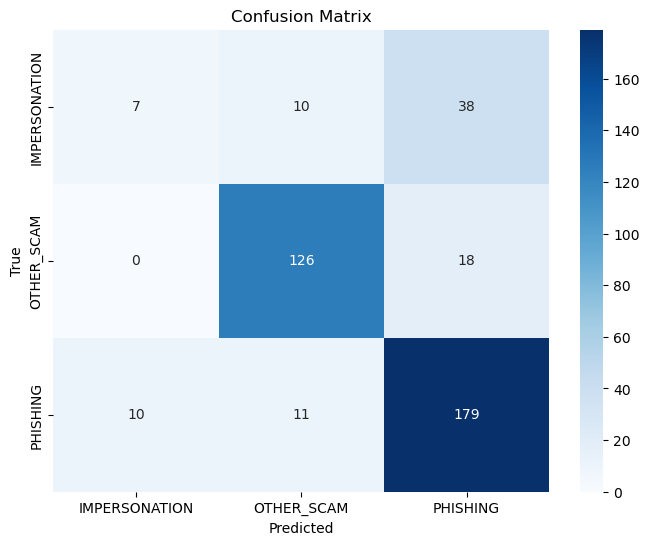

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [21]:
from tabulate import tabulate

# Confusion matrix info
matrix_data = [
    ["Actual \ Predicted", "Impersonation", "Other Scam", "Phishing"],
    ["Impersonation", 7, 10, 38],
    ["Other Scam", 0, 126, 18],
    ["Phishing", 10, 11, 179]
]

# Generate table
matrix_table = tabulate(matrix_data, headers='firstrow', tablefmt='pretty')

# Print
print(matrix_table)



+--------------------+---------------+------------+----------+
| Actual \ Predicted | Impersonation | Other Scam | Phishing |
+--------------------+---------------+------------+----------+
|   Impersonation    |       7       |     10     |    38    |
|     Other Scam     |       0       |    126     |    18    |
|      Phishing      |      10       |     11     |   179    |
+--------------------+---------------+------------+----------+


In [22]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Creating instances of base models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# StackingClassifier
stacked_model = StackingClassifier(
    estimators=[('rf', rf_model), ('gb', gb_model), ('svm', svm_model)],
    final_estimator=RandomForestClassifier(random_state=42)
)

# Train the stacking model on the training data
stacked_model.fit(X_train, y_train)

# Evaluate the stacking model on the validation set
y_val_pred_stacked = stacked_model.predict(X_val)
print("Stacked Model Validation Accuracy: ", accuracy_score(y_val, y_val_pred_stacked))
print(classification_report(y_val, y_val_pred_stacked, target_names=str_labels))


Stacked Model Validation Accuracy:  0.7969924812030075
               precision    recall  f1-score   support

IMPERSONATION       0.53      0.16      0.25        55
   OTHER_SCAM       0.86      0.88      0.87       144
     PHISHING       0.78      0.92      0.84       200

     accuracy                           0.80       399
    macro avg       0.72      0.65      0.65       399
 weighted avg       0.77      0.80      0.77       399



In [23]:
# Loading dataset
merged_df = pd.read_csv('merged_dataset.csv')

label_encoder = LabelEncoder()
merged_df['Scam_Type'] = label_encoder.fit_transform(merged_df['Scam_Type'])

# Getting the class mappings
label_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
print(label_mappings)

# List of scam types to keep
scam_types_to_keep = ['PHISHING', 'IMPERSONATION', 'OTHER_SCAM']

# Filtering the dataset to only include rows with the scam types
filtered_df = merged_df[merged_df['Scam_Type'].isin(scam_types_to_keep)]


{0: 'IMPERSONATION', 1: 'LICIT', 2: 'OTHER_SCAM', 3: 'PHISHING', 4: nan}


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Load dataset
merged_df = pd.read_csv('merged_dataset.csv')

# Filtering the dataset to only include rows with the scam types I'm interested in
scam_types = ['PHISHING', 'IMPERSONATION', 'OTHER_SCAM']
filtered_df = merged_df[merged_df['Scam_Type'].isin(scam_types)]

# Encoding the Scam_Type column to convert categorical labels to numerical labels
label_encoder = LabelEncoder()
filtered_df['Scam_Type'] = label_encoder.fit_transform(filtered_df['Scam_Type'])

# Selecting features and target variable
X = filtered_df.drop(columns=['Scam_Type', 'FLAG', 'Address']) 
y = filtered_df['Scam_Type']

# Oversampling the minority class ('LICIT')
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Splitting the resampled data into training and validation sets (80% train, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test dataset
y_val_pred = model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))

# Getting string class labels
str_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))

# Printing the classification report
print(classification_report(y_val, y_val_pred, target_names=str_labels))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/var/folders/8m/677yqgtn29qgkc_d90d2qrtm0000gn/T/ipykernel_29052/4008404.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Scam_Type'] = label_encoder.fit_transform(filtered_df['Scam_Type'])


Validation Accuracy:  0.88
               precision    recall  f1-score   support

IMPERSONATION       0.82      0.98      0.90       200
   OTHER_SCAM       0.89      0.93      0.91       200
     PHISHING       0.96      0.73      0.83       200

     accuracy                           0.88       600
    macro avg       0.89      0.88      0.88       600
 weighted avg       0.89      0.88      0.88       600



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Loading dataset
merged_df = pd.read_csv('merged_dataset.csv')

# Convert 'NA' values in 'Scam_Type' to 'Illicit' for the binary classification
merged_df['Scam_Type'] = merged_df['Scam_Type'].apply(lambda x: 'ILlicit' if x == 'NA' else x)

# Handle NaN values
# For numeric columns: filling NaN values with the mean
for col in merged_df.select_dtypes(include=['float64', 'int64']).columns:
    merged_df[col].fillna(merged_df[col].mean(), inplace=True)

# For object dtype columns: filling NaN values with 'Unknown' 
for col in merged_df.select_dtypes(include=['object']).columns:
    merged_df[col].fillna('Unknown', inplace=True)

# Add a binary column to distinguish between lict and all forms of Illicit
merged_df['Binary_Scam_Type'] = merged_df['Scam_Type'].apply(lambda x: 'LICIT' if x == 'LICIT' else 'ILlicit')

# Split the data for binary classification
X = merged_df.drop(columns=['Scam_Type', 'FLAG', 'Address', 'Binary_Scam_Type'])
y_binary = merged_df['Binary_Scam_Type']

X_train_binary, X_val_binary, y_train_binary, y_val_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Train a binary classifier
binary_model = RandomForestClassifier(random_state=42)
binary_model.fit(X_train_binary, y_train_binary)

# Evaluate the binary classifier
y_val_pred_binary = binary_model.predict(X_val_binary)
print("Binary Model Validation Accuracy: ", accuracy_score(y_val_binary, y_val_pred_binary))
print("Binary Model Classification Report:")
print(classification_report(y_val_binary, y_val_pred_binary))

# For multiclass classification, filter out licit and split the data
multiclass_df = merged_df[merged_df['Scam_Type'] != 'LICIT']
X_multiclass = multiclass_df.drop(columns=['Scam_Type', 'FLAG', 'Address', 'Binary_Scam_Type'])
y_multiclass = multiclass_df['Scam_Type']

X_train_multiclass, X_val_multiclass, y_train_multiclass, y_val_multiclass = train_test_split(X_multiclass, y_multiclass, test_size=0.2, random_state=42, stratify=y_multiclass)

# Train a multiclass classifier
multiclass_model = RandomForestClassifier(random_state=42)
multiclass_model.fit(X_train_multiclass, y_train_multiclass)

# Evaluate the multiclass classifier
y_val_pred_multiclass = multiclass_model.predict(X_val_multiclass)
print("\nMulticlass Model Validation Accuracy: ", accuracy_score(y_val_multiclass, y_val_pred_multiclass))
print("Multiclass Model Classification Report:")
print(classification_report(y_val_multiclass, y_val_pred_multiclass))


Binary Model Validation Accuracy:  0.9549436795994993
Binary Model Classification Report:
              precision    recall  f1-score   support

     ILlicit       0.96      0.98      0.97       599
       LICIT       0.94      0.88      0.91       200

    accuracy                           0.95       799
   macro avg       0.95      0.93      0.94       799
weighted avg       0.95      0.95      0.95       799


Multiclass Model Validation Accuracy:  0.7312186978297162
Multiclass Model Classification Report:
               precision    recall  f1-score   support

IMPERSONATION       0.35      0.15      0.21        55
   OTHER_SCAM       0.76      0.88      0.81       144
     PHISHING       0.64      0.81      0.72       200
      Unknown       0.90      0.71      0.79       200

     accuracy                           0.73       599
    macro avg       0.66      0.64      0.63       599
 weighted avg       0.73      0.73      0.72       599



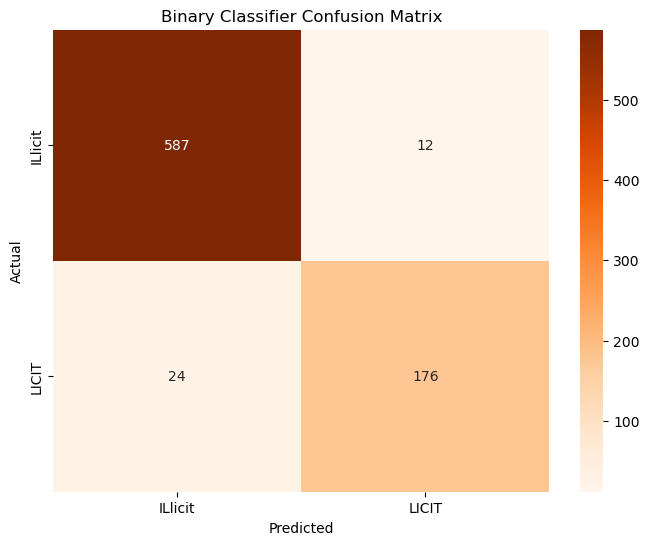

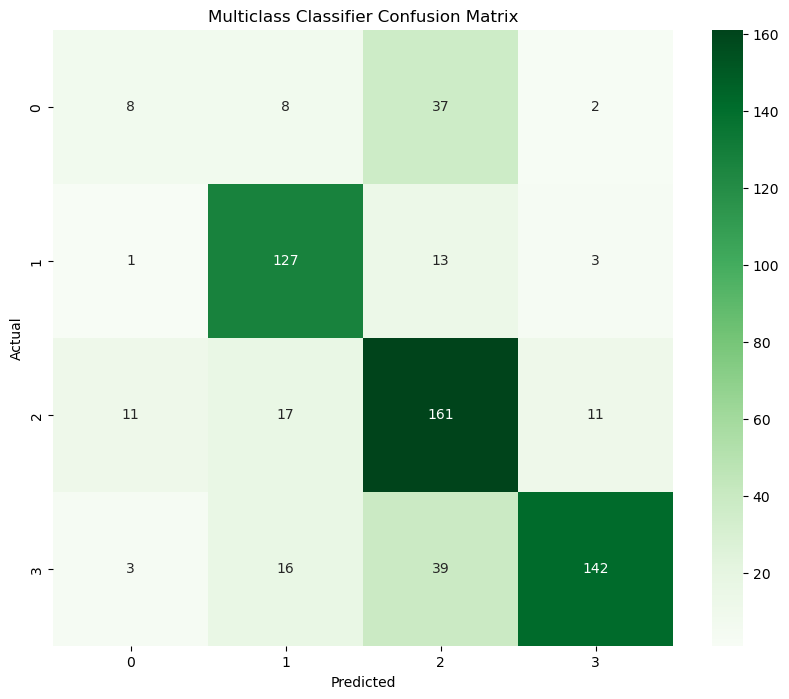

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm_binary = confusion_matrix(y_val_binary, y_val_pred_binary)

# Plot the binary classifier confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_binary, annot=True, fmt="d", cmap="Oranges", xticklabels=["ILlicit", "LICIT"], yticklabels=["ILlicit", "LICIT"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Binary Classifier Confusion Matrix")
plt.show()

# Compute the confusion matrix for multiclass
cm_multiclass = confusion_matrix(y_val_multiclass, y_val_pred_multiclass)

# Plot the multiclass classifier confusion 
plt.figure(figsize=(10,8))
sns.heatmap(cm_multiclass, annot=True, fmt="d", cmap="Greens")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Multiclass Classifier Confusion Matrix")
plt.show()


In [6]:
from tabulate import tabulate

headers_binary = ["", "Predicted ILlicit", "Predicted LICIT"]
table_binary = [["Actual Illicit"] + list(cm_binary[0]), ["Actual LICIT"] + list(cm_binary[1])]
latex_table_binary = tabulate(table_binary, headers=headers_binary, tablefmt="latex")
print("\nBinary Classifier Confusion Matrix in LaTeX:\n")
print(latex_table_binary)

headers_multiclass = ["", "Predicted IMPERSONATION", "Predicted OTHER_SCAM", "Predicted PHISHING", "Predicted Unknown"]
table_multiclass = [
    ["Actual IMPERSONATION"] + list(cm_multiclass[0]),
    ["Actual OTHER_SCAM"] + list(cm_multiclass[1]),
    ["Actual PHISHING"] + list(cm_multiclass[2]),
    ["Actual Unknown"] + list(cm_multiclass[3])
]
latex_table_multiclass = tabulate(table_multiclass, headers=headers_multiclass, tablefmt="latex")
print("\nMulticlass Classifier Confusion Matrix in LaTeX:\n")
print(latex_table_multiclass)



Binary Classifier Confusion Matrix in LaTeX:

\begin{tabular}{lrr}
\hline
                &   Predicted ILlicit &   Predicted LICIT \\
\hline
 Actual Illicit &                 587 &                12 \\
 Actual LICIT   &                  24 &               176 \\
\hline
\end{tabular}

Multiclass Classifier Confusion Matrix in LaTeX:

\begin{tabular}{lrrrr}
\hline
                      &   Predicted IMPERSONATION &   Predicted OTHER\_SCAM &   Predicted PHISHING &   Predicted Unknown \\
\hline
 Actual IMPERSONATION &                         8 &                      8 &                   37 &                   2 \\
 Actual OTHER\_SCAM    &                         1 &                    127 &                   13 &                   3 \\
 Actual PHISHING      &                        11 &                     17 &                  161 &                  11 \\
 Actual Unknown       &                         3 &                     16 &                   39 &                 142 \\
\hline
\e

In [7]:
# Using joblib to store model

import joblib

# Save the model and the label encoder for future use
joblib.dump(model, 'scam_type_classifier.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')


['label_encoder.joblib']